# This notebook: **Linear Regression** implementation and evaluation ***with Python numpy.***

Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['.config', 'energy.txt', 'sample_data']

Data preparation:
- Read data file
- Separate data into datasets
- Normalize data

In [3]:
def get_data(file_path):
  df = pd.read_csv(file_path)

  # Remove null
  df = df.dropna()

  X = df[['T', 'V', 'AP', 'RH']]
  y = df['EP']

  return df, X.values, y.values

In [4]:
def normalize_features(X):
  '''
  Normalize the features (each columns) individually.
  After this, each column should have mean = 0 and standard deviation = 1.
  '''
  mean = np.mean(X, axis=0)
  std = np.std(X, axis=0)
  std[std == 0] = 1e-8 # replace 0 with very small number to avoid division by zero error

  X_normalized = (X - mean) / std

  return X_normalized

In [5]:
def train_test_split(X, y, test_size=0.2):
  if X.shape[0] != y.shape[0]:
    raise ValueError('X and y must have the same number of samples.')

  num_samples = X.shape[0]
  test_samples = int(num_samples * test_size)

  # Randomly shuffle before sampling
  indices = np.arange(num_samples)
  np.random.shuffle(indices)

  # Split data
  X_train = X[indices[:-test_samples]]
  X_test = X[indices[-test_samples:]]

  y_train = y[indices[:-test_samples]]
  y_test = y[indices[-test_samples:]]

  return X_train, X_test, y_train, y_test

Functions to implement Linear Regression:
- Loss function
- Train function with Gradient Descent (update weights and bias)

In [6]:
def init_params(X):
  w = np.random.rand(X.shape[1])
  b = 0
  return w, b

In [7]:
def mse_loss(y_true, y_pred):
  return np.mean((y_pred - y_true) ** 2)

Ref Linear Regression with Gradient Descent: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [8]:
def train_LinearR(X_train, y_train, learning_rate=0.0001, epochs=1000):

  # Init weights and bias
  weights, bias = init_params(X_train)

  # Record loss
  loss_record = []

  for epoch in range(epochs):
    y_predicted = np.dot(X_train, weights) + bias

    loss = mse_loss(y_train, y_predicted)
    loss_record.append(loss)

    # Calculate gradients for weights and bias; using MSE loss
    weights_grad = -2 / X_train.shape[0] * np.dot(X_train.T, (y_train - y_predicted))
    bias_grad = -2 / X_train.shape[0] * np.sum(y_train - y_predicted)

    # Update weights and bias
    weights -= learning_rate * weights_grad
    bias -= learning_rate * bias_grad

  return weights, bias, loss_record

Use the model

In [9]:
df, X, y = get_data('energy.txt')
X = normalize_features(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
weights, bias, loss_history = train_LinearR(X_train, y_train, learning_rate=0.0001, epochs=10000)
print('Weights: ', weights)
print('Bias: ', bias)

Weights:  [-7.41099834 -7.75731294  2.9419646   0.03941396]
Bias:  392.92472809151036


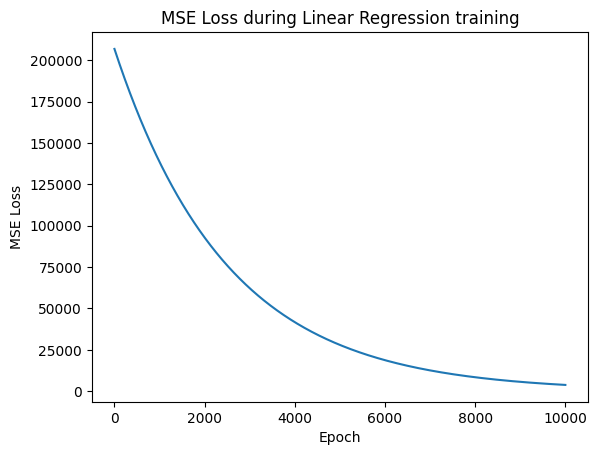

In [21]:
# Plot loss
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('MSE Loss during Linear Regression training')
plt.show()

Evaluate and test

In [16]:
def predict(X, weights, bias):
  return np.dot(X, weights) + bias

Ref R-squared: https://builtin.com/data-science/adjusted-r-squared

In [23]:
def r_squared(y_true, y_predicted):
  y_bar = np.mean(y_true)
  # sum of explained and unexplained variation
  # or the difference between y true and mean of y true
  ss_total = np.sum((y_true - y_bar) ** 2)
  # unexplained variation: difference between true and predicted value --> the difference that is not captured by our Regression model
  # known as: residual of a regression model
  ss_residual = np.sum((y_true - y_predicted) ** 2)

  # (extended) explained variation: difference between predicted value and mean of y true value --> the variation that is explained by the model
  # ss_explained = np.sum((y_predicted - y_bar) ** 2)

  r2 = 1 - ss_residual/ss_total

  return r2

In [24]:
y_test_predicted = predict(X_test, weights, bias)
mse = mse_loss(y_test, y_test_predicted)
r2 = r_squared(y_test, y_test_predicted)

print('MSE = {}, R2 = {}'.format(mse, r2))

MSE = 3829.297168772564, R2 = -11.973879220460894


Compare with sklearn evaluate:

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared (R^2)
r_squared = r2_score(y_test, y_test_predicted)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_predicted)

print(f"R-squared (R^2): {r_squared:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared (R^2): -11.97
Mean Squared Error (MSE): 3829.30


CORRECT!